In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('Credit Card Customer Data.csv')
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


# MEAN, MEDIAN, MIN, MAX

In [4]:
data.describe().T 

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [6]:
data.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [7]:
def plot_heatmap(correlation_matrix):
    '''
    Plotting the heatmap of correlation matrix using correlation dataframe.
    
    Parameters:
        correlation_matrix (dataframe): The dataframe containing the correlation data for all numerical columns.
    '''
    plt.figure(figsize=(8, 5), dpi=300)
    sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')
    plt.title("Correlation Heatmap of Numerical Features")
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')
    plt.savefig('heatmap.png', bbox_inches='tight')
    plt.show()

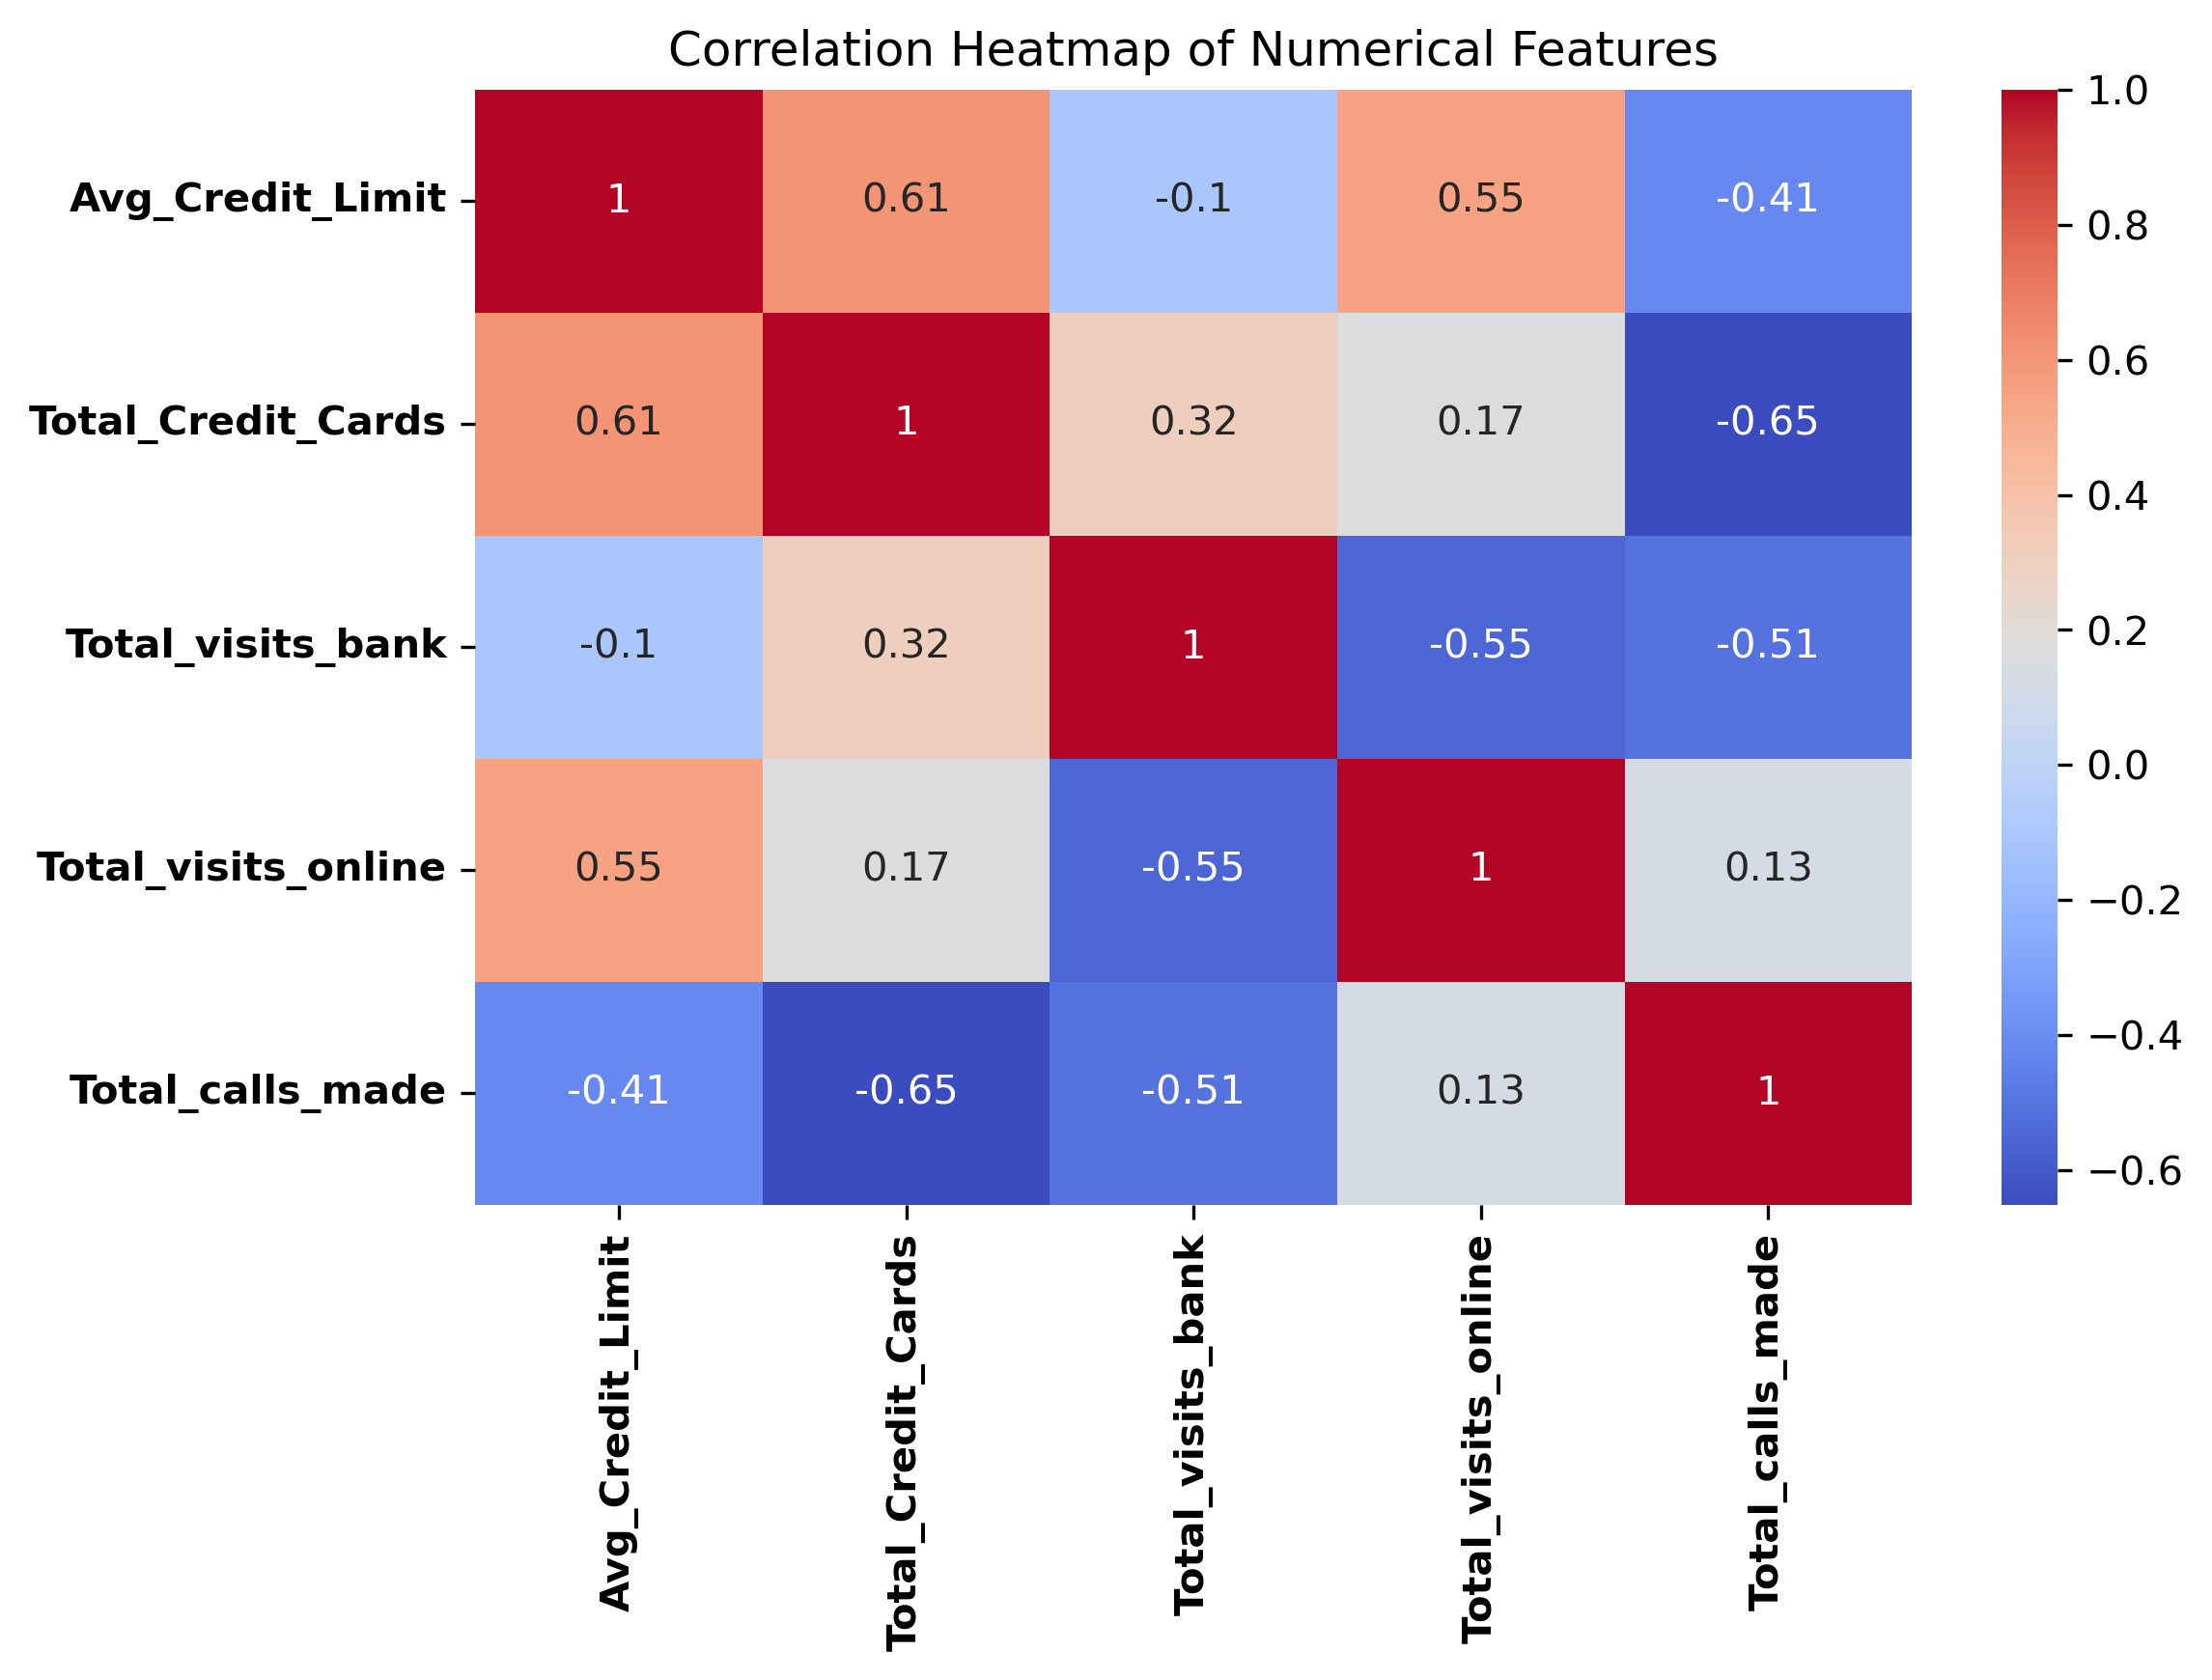

In [8]:
# selecting featured columns
featured_data = data.iloc[:,2:]
plot_heatmap(featured_data.corr())

# STANDARD DEVIATION, SKEWNESS, KURTOSIS

In [10]:
stats_df = featured_data.describe().loc[['mean', 'std']]
skewness = featured_data.skew()
kurt = featured_data.kurtosis()
stats_df.loc['skewness'] = skewness
stats_df.loc['kurtosis'] = kurt
stats_df = stats_df.T
column_renames = {'mean':'Mean', 'std' : 'Standard Deviation', 'skewness' : 'Skewness', 'kurtosis': 'Kurtosis'}
stats_df = stats_df.rename(columns = column_renames)
stats_df

,Mean,Standard Deviation,Skewness,Kurtosis
Avg_Credit_Limit,34574.242424,37625.487804,2.202396,5.133842
Total_Credit_Cards,4.706061,2.167835,0.144879,-0.369770
Total_visits_bank,2.403030,1.631813,0.141896,-1.104274
Total_visits_online,2.606061,2.935724,2.225607,5.739572
Total_calls_made,3.583333,2.865317,0.658905,-0.518264


In [11]:
correlation_matrix = featured_data.corr()
high_corr_vars = correlation_matrix[(correlation_matrix > 0.5) | (correlation_matrix < -0.5)]

print("Highly correlated variables:")
high_corr_vars

Highly correlated variables:


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Credit_Limit,1.000000,0.608860,NaN,0.551385,NaN
Total_Credit_Cards,0.608860,1.000000,NaN,NaN,-0.651251
Total_visits_bank,NaN,NaN,1.000000,-0.551861,-0.506016
Total_visits_online,0.551385,NaN,-0.551861,1.000000,NaN
Total_calls_made,NaN,-0.651251,-0.506016,NaN,1.000000


In [12]:
def plot_frequency_bank_visits_by_customers(data):
    '''
    Plotting the bar plot for customer's Frequency of Total Bank Visits.

    Parameters:
        data (dataframe): The Dataframe containing the Total_visits_bank column.
    '''
    plt.figure(figsize=(8, 6))
    data['Total_visits_bank'].value_counts().plot(kind='barh',color='green');
    plt.title('Distribution of Total Bank Visits by Customers', fontweight='bold')
    plt.xlabel('Frequency', fontsize=14)
    plt.ylabel('Total Bank Visits By Customers', fontsize=14)
    plt.savefig('plot_frequency_bank_visits_by_customers.png')
    plt.show()

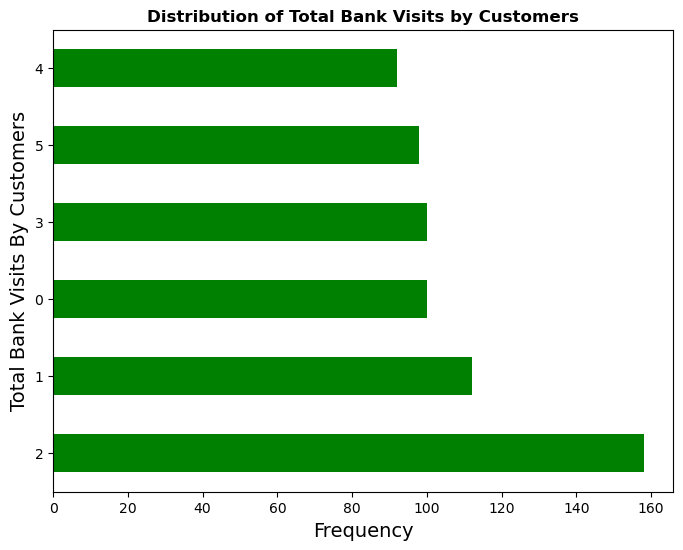

In [13]:
plot_frequency_bank_visits_by_customers(data)

In [14]:
def plot_scatter_avg_credit_limit_against_total_credit_cards(data):
    '''
    Plotting the scatter plot for customer's Avg_Credit_Limit and Total_Credit_Cards

    Parameters:
        data (dataframe): The Dataframe containing the Avg_Credit_Limit  and Total_Credit_Cards column.
    '''
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Avg_Credit_Limit',y='Total_Credit_Cards',data=featured_data)
    plt.title("Relationship Between Total Credit Cards and Average Credit Limit", fontsize=12, fontweight='bold')
    plt.xlabel("Average Credit Limit in Pounds", fontsize=15)
    plt.ylabel("Total Number of Credit Cards", fontsize=15)
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')
    plt.tight_layout()
    # plt.xlim(0, 0.25)
    plt.savefig('plot_scatter_avg_credit_limit_against_total_credit_cards.png')
    plt.show()

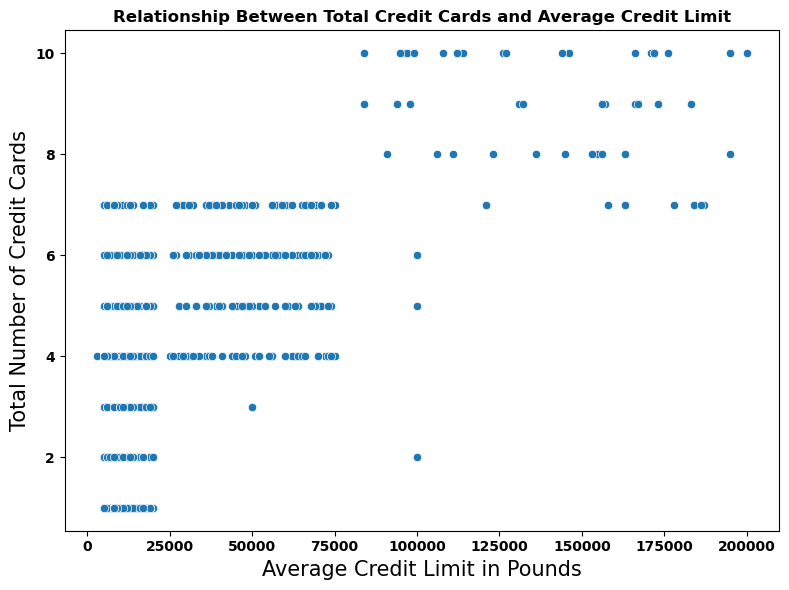

In [15]:
plot_scatter_avg_credit_limit_against_total_credit_cards(featured_data)


In [16]:
def plot_avg_credit_limit_distribution_using_histogram(data):
    '''
    Plotting Histogram for the average credit limit distribution of customers.

    Parameters:
        data (dataframe): The Dataframe containing the Avg_Credit_Limit column.
    '''
    plt.figure(figsize=(8, 6))
    plt.grid(True, alpha=0.2)
    sns.histplot(data['Avg_Credit_Limit'], kde=True, color='green')
    plt.title("Distribution of Average Credit Limit", fontsize=13, fontweight='bold')
    plt.xlabel("Average Credit Limit", fontsize=15)
    plt.ylabel("Frequency", fontsize=15)
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')
    plt.tight_layout()
    plt.savefig('plot_avg_credit_limit_distribution_using_histogram.png')
    plt.show()

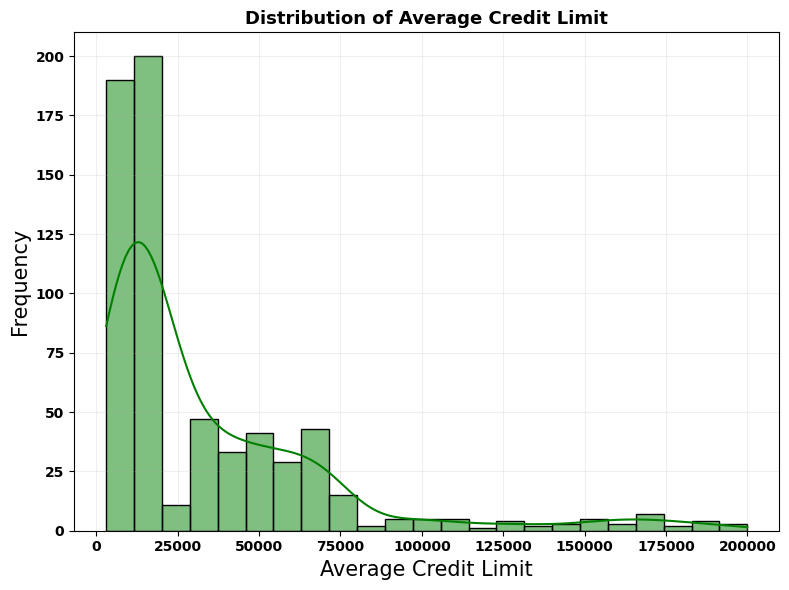

In [17]:
plot_avg_credit_limit_distribution_using_histogram(featured_data)

# Scalling Data and finding WCSS

In [19]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(featured_data)
data_scaled = pd.DataFrame(data_scaled, columns=featured_data.columns)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init ='k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plotting Elbow Curve to Find optimal K

In [21]:
def plot_elbow_method(wcss):
    """
    Plot the elbow curve and silhouette scores to find the optimal number of clusters.

    Parameters:
        wcss (list or array-like): List of inertia values for different numbers of clusters.
    """
    plt.figure(figsize=(8, 6))
    plt.grid(True, alpha=0.2)
    plt.plot(range(1, 11), wcss, marker='o')
    plt.title('Elbow Method for Optimal K', fontweight='bold')
    plt.xlabel('Number of clusters', fontsize=14, fontweight='bold')
    plt.ylabel('WCSS', fontsize=14, fontweight='bold') 
    plt.savefig('plot_elbow_method.png')
    plt.show()

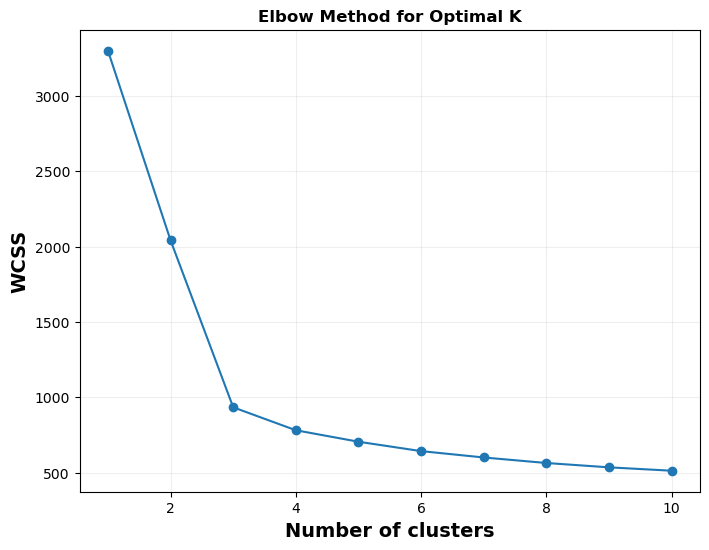

In [22]:
plot_elbow_method(wcss)

# K-Means Clustering

In [24]:
def clustering(data_scaled, num_clusters):
    """
    Perform K-means Clustering on the given data.

    Parameters:
    - data (array-like): The input data for clustering.
    - num_clusters (int): The number of clusters to form.

    Returns:
    - clusters (array): Array of cluster labels for each data point.
    - cluster_centers (array): Array of cluster centers in the original feature space.
    """
    kmeans = KMeans(n_clusters = num_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    y_kmeans = kmeans.fit_predict(data_scaled)
    kmeans.fit(data_scaled)
    # Get cluster centers
    cluster_centers = kmeans.cluster_centers_

    return cluster_centers, y_kmeans

In [25]:
k = 3 # based on elbow
cluster_centers, y_kmeans = clustering(data_scaled, k)

In [26]:
def visualize_clustering(data_scaled, cluster_centers, y_kmeans, k):
    """
        Visualize the clusters along with predicted points.
    
        Parameters:
        - data (array-like): The original data.
        - clusters (array): Array of cluster labels for each data point.
        - cluster_centers (array): Array of cluster centers in the original feature space.
        - Agglomerative : Fitted KMeans model.
    """
    # Assuming y_kmeans contains cluster labels (0, 1, 2)
    colors = ['r', 'b', 'g']
    plt.figure(figsize=(8, 6))
    x_centers = cluster_centers[:,0]
    y_centers = cluster_centers[:,1]
    for i in range(k):
        cluster_data = data_scaled[y_kmeans == i]
        plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], s=50, c=colors[i], label=f'Cluster {i+1}')
        plt.scatter(x_centers[i], y_centers[i], marker='x', s=150, c=colors[i], label='Centroid');
    plt.title("Clusters with predicted points", fontsize=12, fontweight='bold')
    plt.xlabel("Average Credit Limit in Pounds", fontsize=14, fontweight='bold')
    plt.ylabel("Total Number of Credit Cards", fontsize=14, fontweight='bold')
    plt.legend()
    plt.tight_layout()
    plt.savefig('visualize_clustering.png')
    plt.show()

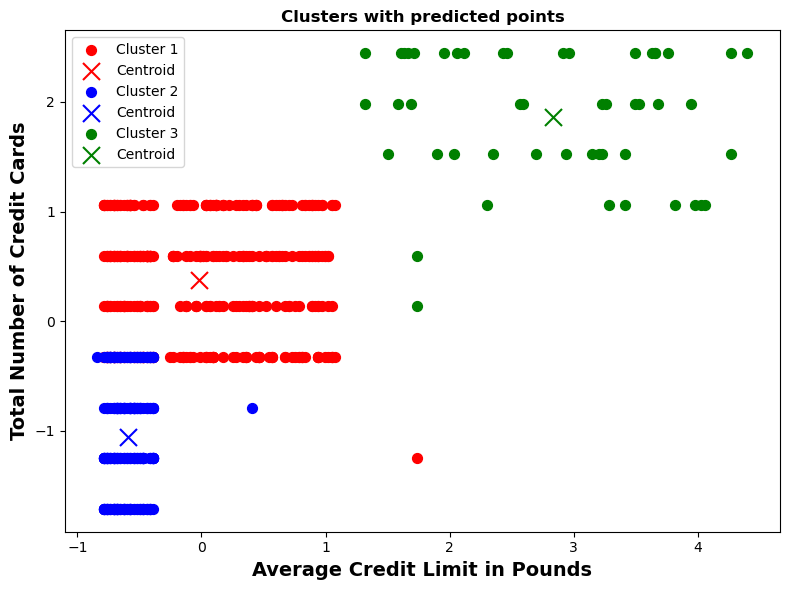

In [27]:
visualize_clustering(data_scaled, cluster_centers, y_kmeans, k)

### Silhoutte Score

In [29]:
range_n_clusters = [2, 3, 4, 5]
silhoute_scores = {}
for n_clusters in range_n_clusters:
    # Create a KMeans instance with the current number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, init='k-means++', max_iter=400, n_init=10)
    
    # Fit the model to the data
    cluster_labels = kmeans.fit_predict(data_scaled)
    
    # Calculate silhouette scores
    silhouette_vals = silhouette_samples(data_scaled, cluster_labels)
    
    avg_silhouette_score = silhouette_vals.mean()
    silhoute_scores.update({n_clusters: round(avg_silhouette_score, 2)})
max_cluster = max(silhoute_scores, key=silhoute_scores.get)
max_value = silhoute_scores[max_cluster]
print(f"The maximum silhoueette score is {max_value} in cluster number {max_cluster}")

The maximum silhoueette score is 0.52 in cluster number 3


# Fitting

In [31]:
def fit_linear_regression(data, independent_var, dependent_var, test_size=0.02, random_state=42):
    """
    Fit a linear regression model to analyze the relationship between
    a dependent variable and an independent variable with train-test split.

    Parameters:
    - data (DataFrame): The dataset containing the variables.
    - independent_var (str): The name of the independent variable.
    - dependent_var (str): The name of the dependent variable.
    - test_size (float): The proportion of the dataset to include in the test split.

    Returns:
    - model (LinearRegression): Fitted linear regression model.
    - X_test (DataFrame): Independent variable values for the test data.
    - y_test (Series): Actual test values of the dependent variable.
    """
    X = data[independent_var].values.reshape(-1, 1)
    y = data[dependent_var]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    model = LinearRegression()
    model.fit(X_train, y_train)
    
    return model, X_test, y_test

In [32]:
independent_var = 'Avg_Credit_Limit' 
dependent_var = 'Total_Credit_Cards'

# Fit linear regression model
model, X_test, y_test = fit_linear_regression(data, independent_var, dependent_var)



In [33]:
def evaluate_model(model, X_test, y_test):
    """
    Evaluate the performance of the linear regression model using mean squared error and R-squared.

    Parameters:
    - model (LinearRegression): The fitted linear regression model.
    - X_test (array-like): The feature values for testing.
    - y_test (array-like): The actual target values for testing.

    Returns:
    - mse (float): Mean Squared Error of the model.
    - r2 (float): R-squared value of the model.
    """
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    print("Model - Mean Squared Error:", mse)
    print("Model - R-squared Score:", r2)

    return predictions

In [34]:
# Evaluate model performance
predictions = evaluate_model(model, X_test, y_test)

Model - Mean Squared Error: 2.282437576896673
Model - R-squared Score: 0.4330066348900534


In [35]:
def calculate_confidence_interval(predictions, y_test, n, t_value=2.262):
    """
    Calculate the confidence intervals for the model's predictions.

    Parameters:
    - predictions (array-like): The predicted target values.
    - y_test (array-like): The actual target values.
    - n (int): Number of test samples.
    - t_value (float): T-value for the confidence interval (default for 95% confidence).

    Returns:
    - lower_bound (array-like): Lower bounds of the confidence intervals.
    - upper_bound (array-like): Upper bounds of the confidence intervals.
    """
    se = np.sqrt(np.sum((y_test - predictions)**2) / (n - 2))
    margin_of_error = t_value * se

    lower_bound = predictions - margin_of_error
    upper_bound = predictions + margin_of_error

    return lower_bound, upper_bound, margin_of_error

In [36]:
# Calculate confidence intervals
n = len(X_test)
lower_bound, upper_bound, margin_of_error = calculate_confidence_interval(predictions, y_test, n)

In [37]:
def plot_regression_results(X_test, y_test, predictions, margin_of_error):
    """
    Plot the results of a regression model, including actual vs. predicted values with confidence intervals.

    Parameters:
    - X_test (array-like): The feature values for testing.
    - y_test (array-like): The actual target values for testing.
    - predictions (array-like): The predicted target values.
    - margin_of_error (array-like): The margin of error for each prediction.

    Returns:
    - None
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test[:, 0], y_test, color='green', label='Actual (CO(GT))', marker='o')
    plt.plot(X_test[:, 0], predictions, color='red', label='Predicted (CO(GT))', marker='x')
    plt.errorbar(X_test[:, 0], predictions, yerr=margin_of_error, fmt='o', color='blue', label='95% Confidence Intervals', capsize=4, elinewidth=0.5, capthick=0.5)

    plt.xlabel('Avg_Credit_Limit', fontsize=13, fontweight='bold')
    plt.ylabel('Total_Credit_Cards', fontsize=13, fontweight='bold')
    plt.title('Fitted Regression Line with Confidence Intervals', fontweight='bold')
    plt.legend()
    plt.grid(True)
    plt.savefig('plot_regression_results.png')
    plt.show()

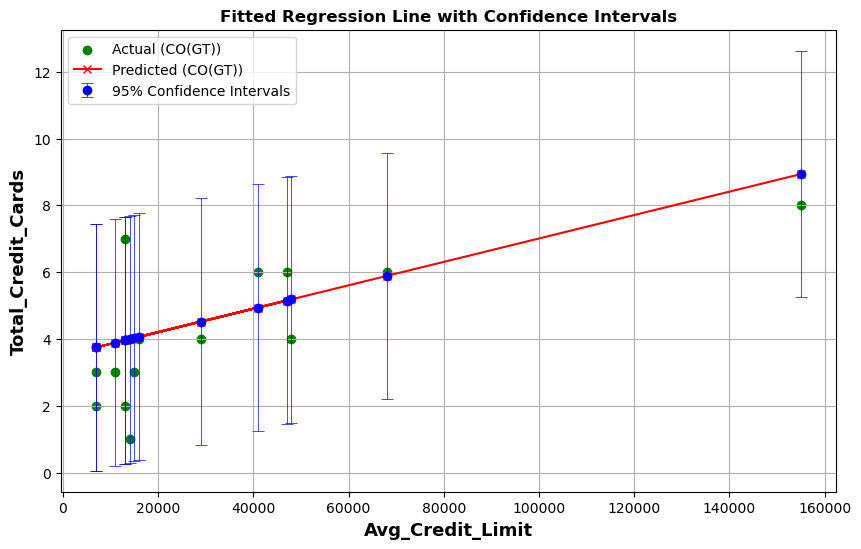

In [38]:
plot_regression_results(X_test, y_test, predictions, margin_of_error)